In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Calculates the polynomial
def y(time,w):
    new_y = 0
    for i in range(len(w)):
        new_y += w[i]*time**i
    return new_y

# Calculates the MSE (Mean Square Error)
def mse(time,signal,w):
     return (signal-time@w).T @ (signal-time@w) / len(time)

# Calculates the coefficients according to the training data
def calc_w(time,signal,lamda=0):
    mat = np.linalg.inv(time.T @ time + lamda*np.eye(time.shape[1])) @ time.T @ signal
    return mat

# Creates a matrix for the training data with a column of ones and a column of x raised to the power of d
def create_matrix(t,f):
    new_x = np.ones((len(t), 2))
    new_x[:,1] = np.cos(2*np.pi*f*t)
    return new_x

In [37]:
# Loading the data
labels = pd.read_csv("header_labels.csv", skip_blank_lines=False)
header_time = pd.read_csv("header_data_part_b.csv")['time'].values
header_signal = pd.read_csv("header_data_part_b.csv")['Noisy signal'].values
time = pd.read_csv("signal_part_b.csv")['time'].values
signal = pd.read_csv("signal_part_b.csv")['Noisy signal'].values

# Splitting the signals into parts of 100
split_header_time = np.array_split(header_time, np.ceil(len(header_time)/100))
split_header_signal = np.array_split(header_signal, np.ceil(len(header_signal)/100))
split_time = np.array_split(time, np.ceil(len(time)/100))
split_signal = np.array_split(signal, np.ceil(len(signal)/100))

In [ ]:
# In this part, we want to identify which frequency corresponds to each char.
# We know that the order of characters is the same as part A.
# We can test the frequencies 1-48 to see which one will give us the lowest MSE.
# We will then create our own Learned_Symbols2Freqs.csv file and use it to decode the message.

freqs = []

for i in range(len(split_header_time)):

    # Finding the optimal order for the Polynomial Regressor
    train_err = []
    w_by_order = []

    for freq in range(1,49):
        new_train_matrix = create_matrix(split_header_time[i],freq)
        w = calc_w(new_train_matrix,split_header_signal[i])
        # print(f'W Order {i}: {w}')
        w_by_order.append(w)
        train_err.append(mse(new_train_matrix,split_header_signal[i],w))
    
    # Saving the frequency that fits the char the most
    lowest_err = 100
    index = 0
    for i in train_err:
        if i < lowest_err:
            lowest_err = i
            index = train_err.index(i)

    freqs.append(index+1)

# Creating the Learned_Symbols2Freqs.csv file
labels['frequency'] = freqs
labels.to_csv("Learned_Symbols2Freqs.csv", index=False)


Message:  WELL DONE! YOU SUCCESFULLY COMPLETED PART B OF THE MACHINE LEARNING TASK IN THE COURSE 'INTRODUCTION TO DIGITAL SIGNAL AND INFORMATION PROCESSING'. SEE YOU IN THE MACHINE LEARNING COURSE NEXT YEAR!
Frequencies:  [23, 4, 18, 18, 26, 27, 16, 24, 4, 15, 26, 14, 16, 3, 26, 22, 3, 42, 42, 4, 22, 33, 3, 18, 18, 14, 26, 42, 16, 41, 46, 18, 4, 31, 4, 27, 26, 46, 6, 11, 31, 26, 45, 26, 16, 33, 26, 31, 7, 4, 26, 41, 6, 42, 7, 39, 24, 4, 26, 18, 4, 6, 11, 24, 39, 24, 30, 26, 31, 6, 22, 36, 26, 39, 24, 26, 31, 7, 4, 26, 42, 16, 3, 11, 22, 4, 26, 13, 39, 24, 31, 11, 16, 27, 3, 42, 31, 39, 16, 24, 26, 31, 16, 26, 27, 39, 30, 39, 31, 6, 18, 26, 22, 39, 30, 24, 6, 18, 26, 6, 24, 27, 26, 39, 24, 33, 16, 11, 41, 6, 31, 39, 16, 24, 26, 46, 11, 16, 42, 4, 22, 22, 39, 24, 30, 13, 34, 26, 22, 4, 4, 26, 14, 16, 3, 26, 39, 24, 26, 31, 7, 4, 26, 41, 6, 42, 7, 39, 24, 4, 26, 18, 4, 6, 11, 24, 39, 24, 30, 26, 42, 16, 3, 11, 22, 4, 26, 24, 4, 5, 31, 26, 14, 4, 6, 11, 15]
Length of message:  197
In this 

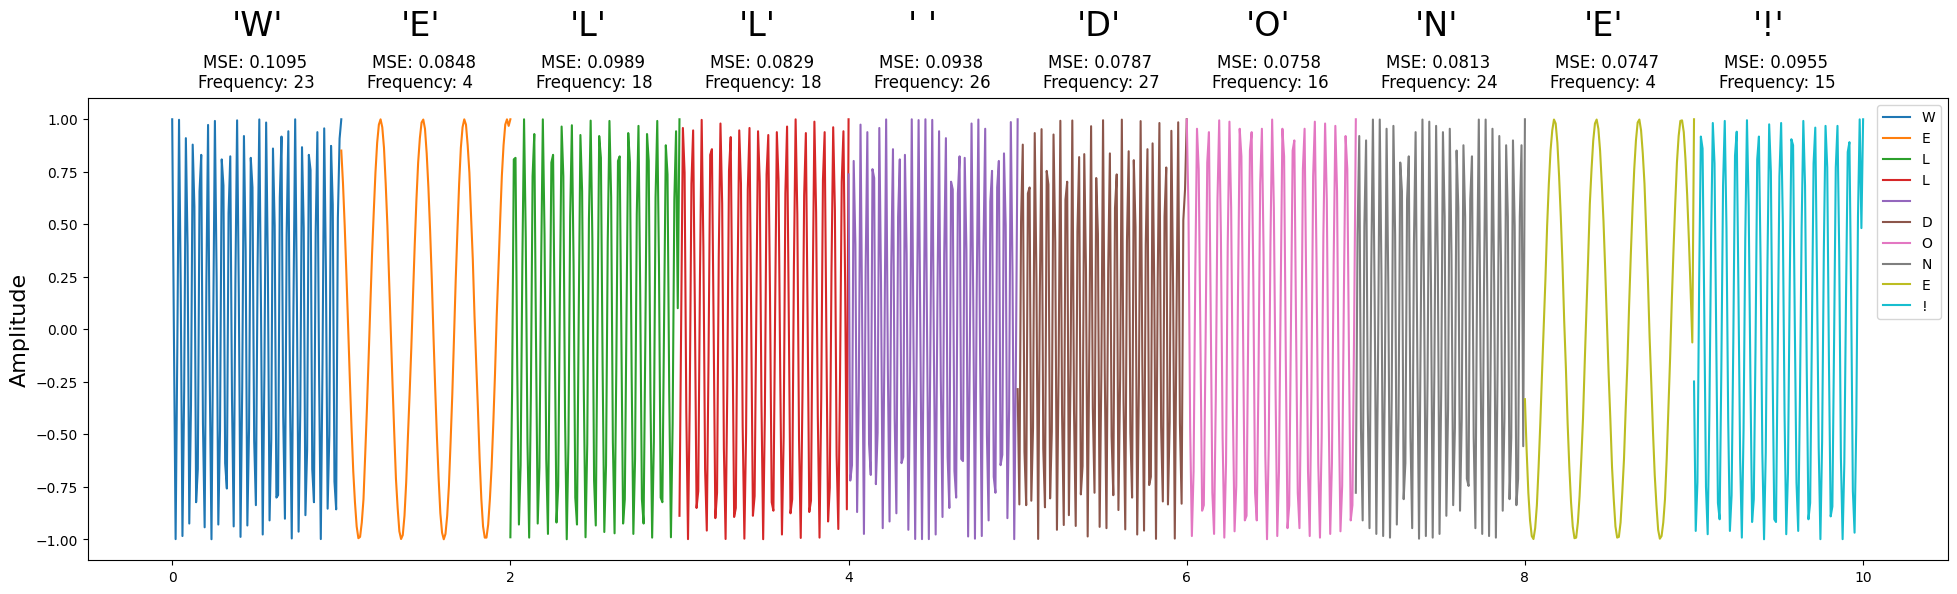

In this plot we can see how the MSE changes for each frequency, and the lowest MSE shows us what the most fitting frequency is for each char.


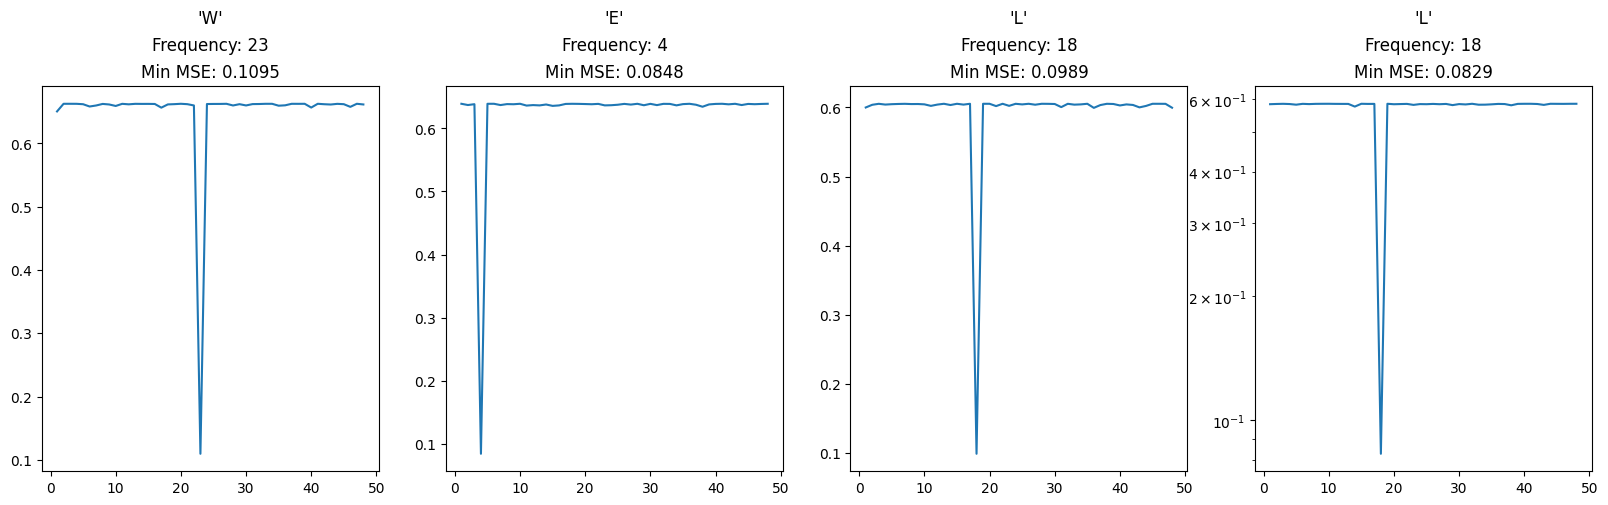

In [65]:
# Loading the learned symbols
symbols = pd.read_csv("Learned_Symbols2Freqs.csv")
symbols_dict = dict(zip(symbols['frequency'], symbols['symbol']))

# Initializing variables
message = ''
freqs = []
# Optional for the decision plot
example_train_err = []

# Decoding the message using the learned symbols
for i in range(len(split_time)):

    train_err = []
    w_by_order = []

    # Trying out frequencies 1-48 and calculating the error for each of them
    for freq in range(1,49):
        new_train_matrix = create_matrix(split_time[i],freq)
        w = calc_w(new_train_matrix,split_signal[i])
        # print(f'W Order {i}: {w}')
        w_by_order.append(w)
        train_err.append(mse(new_train_matrix,split_signal[i],w))
        # Error for plotting
        if freq == 1:
            example_train_err.append([])
        example_train_err[i].append(mse(new_train_matrix,split_signal[i],w))
    
    # Saving the frequency that fits the char the most
    lowest_err = np.inf
    best_freq = 0
    for i in train_err:
        if i < lowest_err:
            lowest_err = i
            best_freq = train_err.index(i) + 1
            
    freqs.append(best_freq)

    # Decoding the message
    message += str(symbols_dict[best_freq])

print('Message: ', message)
print('Frequencies: ', freqs)
print('Length of message: ', len(message))

# Prints for the data

# for i in range(len(train_err)):
#     print(f'{i} Order Train Error: {train_err[i]}')

# for i in range(len(w_by_order)):
#     print(f'{i} Order Coefficients: {w_by_order[i]}')

# Taking the first 2 words of the message
plot_freqz = np.array(freqs)[0:10]
plot_signal = []
for i in range(len(plot_freqz)):
    my_signal = np.cos(2*np.pi*plot_freqz[i]*split_time[i])
    plot_signal.append(my_signal)

# Plotting the first 2 words of the signal, and the decoded message

print("In this plot, we can see each signal, it's decoded char, the MSE, and the frequency that allowed us to identify this signal.")

plt.figure(figsize=(24, 6))
for i in range(len(plot_signal)):
    t = np.linspace(0+i, 1+i, 100)
    char = symbols_dict[freqs[i]]
    plt.plot(t,plot_signal[i], label=char)
    plt.text(0.35 + i, 1.4, f"'{char}'", fontsize=24, color='black')
    plt.text(0.18 + i, 1.25, "MSE: " + "%.4f" % min(example_train_err[i]), fontsize=12, color='black')
    plt.text(0.15 + i, 1.15, f"Frequency: {freqs[i]}", fontsize=12, color='black')
    plt.ylabel('Amplitude', fontsize=16)
    plt.legend()

plt.show()

# Decision plot

print("In this plot we can see how the MSE changes for each frequency, and the lowest MSE shows us what the most fitting frequency is for each char.")

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
x = range(1,49)

for i,ax in enumerate(axes):
    ax.plot(x,example_train_err[i], label="Train Error")
    ax.text(0.5, 1.20, f"'{symbols_dict[freqs[i]]}'", transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')
    ax.text(0.5, 1.13, f"Frequency: {freqs[i]}", transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')
    ax.text(0.5, 1.06, "Min MSE: " + "%.4f" % min(example_train_err[i]), transform=ax.transAxes, ha="center", va="top", fontsize=12, color='black')

plt.yscale('log')
plt.show()